In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cycler
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('df2.csv')
df

,year,vwretd,vwretx,vwRetd,vwRetx,rf,Rf,DP,DG,cay
0,1952,0.133324,0.074015,1.133324,1.074015,0.0173,1.0173,0.055222,1.014585,0.022166
1,1953,0.003843,-0.050273,1.003843,0.949727,0.0209,1.0209,0.056981,0.979976,0.012191
2,1954,0.504120,0.433636,1.504120,1.433636,0.0160,1.0160,0.049165,1.236983,0.025424
3,1955,0.254135,0.204040,1.254135,1.204040,0.0115,1.0115,0.041606,1.018926,0.019292
4,1956,0.085817,0.043745,1.085817,1.043745,0.0254,1.0254,0.040309,1.011206,-0.002524
...,...,...,...,...,...,...,...,...,...,...
63,2015,-0.015995,-0.037069,0.984005,0.962931,0.0003,1.0003,0.021885,1.008804,-0.023502
64,2016,0.129461,0.104250,1.129461,1.104250,0.0023,1.0023,0.022831,1.151962,-0.019028
65,2017,0.209028,0.184488,1.209028,1.184488,0.0051,1.0051,0.020718,1.074860,-0.024902
66,2018,-0.061828,-0.081145,0.938172,0.918855,0.0132,1.0132,0.021023,0.932386,-0.020207


In [3]:
from functools import reduce
for j in range(1, 11):
    df['Rtt{}'.format(j)] = reduce(lambda x, y: x * y, [df['vwRetd'].shift(-i) for i in range(1, j + 1)])
    df['Rftt{}'.format(j)] = reduce(lambda x, y: x * y, [df['Rf'].shift(-i) for i in range(1, j + 1)])
    df['ExRtt{}'.format(j)] = df['Rtt{}'.format(j)] - df['Rftt{}'.format(j)]
df

,year,vwretd,vwretx,vwRetd,vwRetx,rf,Rf,DP,DG,cay,...,ExRtt7,Rtt8,Rftt8,ExRtt8,Rtt9,Rftt9,ExRtt9,Rtt10,Rftt10,ExRtt10
0,1952,0.133324,0.074015,1.133324,1.074015,0.0173,1.0173,0.055222,1.014585,0.022166,...,1.830424,3.042557,1.228584,1.813973,3.862846,1.256227,2.606619,3.464505,1.288889,2.175617
1,1953,0.003843,-0.050273,1.003843,0.949727,0.0209,1.0209,0.056981,0.979976,0.012191,...,1.827477,3.848058,1.230509,2.617549,3.451242,1.262503,2.188740,4.172124,1.298736,2.873388
2,1954,0.504120,0.433636,1.504120,1.433636,0.0160,1.0160,0.049165,1.236983,0.025424,...,1.347214,2.294526,1.242621,1.051905,2.773797,1.278284,1.495513,3.226032,1.323280,1.902752
3,1955,0.254135,0.204040,1.254135,1.204040,0.0115,1.0115,0.041606,1.018926,0.019292,...,0.601075,2.211722,1.263751,0.947971,2.572316,1.308235,1.264081,2.942367,1.358471,1.583896
4,1956,0.085817,0.043745,1.085817,1.043745,0.0254,1.0254,0.040309,1.011206,-0.002524,...,0.804473,2.369014,1.275829,1.093186,2.709818,1.324821,1.384998,2.474368,1.382848,1.091520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2015,-0.015995,-0.037069,0.984005,0.962931,0.0003,1.0003,0.021885,1.008804,-0.023502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,2016,0.129461,0.104250,1.129461,1.104250,0.0023,1.0023,0.022831,1.151962,-0.019028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,2017,0.209028,0.184488,1.209028,1.184488,0.0051,1.0051,0.020718,1.074860,-0.024902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,2018,-0.061828,-0.081145,0.938172,0.918855,0.0132,1.0132,0.021023,0.932386,-0.020207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def HH_se(X, resid, maxlags):
    X_ = X * resid[:, np.newaxis]
    s = np.dot(X_.transpose(), X_) / X_.shape[0]
    if maxlags > 0:
        s += 2 * sum(np.dot(X_[: -j].transpose(), X_[j:]) / (X_.shape[0]) for j in range(1, maxlags + 1))
    sxx = np.linalg.inv(np.dot(X.transpose(), X) / X.shape[0])
    se = np.dot(np.dot(sxx, s), sxx) / X.shape[0]
    return np.sqrt(np.diag(se))

In [5]:
for j in range(1, 11):
    # Extract the regression sample
    sample = df[['ExRtt{}'.format(j), 'DP']].copy()
    # Drop the rows where at least one element is missing
    sample.dropna(inplace = True)
    # Dependent variable (nparray)
    Y = np.array(sample['ExRtt{}'.format(j)])[:, np.newaxis]
    # Independent variables (nparray)
    X = np.array(sample['DP'])[:, np.newaxis]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    result = model.fit()
    print('b:', result.params[1], 't-stats:', result.params[1] / HH_se(X, result.resid, j - 1)[1])

b: 3.265225175586636 t-stats: 1.633508748887336
b: 5.9002599388365535 t-stats: 1.4926996736470395
b: 6.984452549520245 t-stats: 1.4078491550781218
b: 8.266538451958363 t-stats: 1.6684349444330733
b: 12.498455184684065 t-stats: 2.3693324522605224
b: 18.619488525025808 t-stats: 2.735900131683026
b: 24.50670756581941 t-stats: 3.58386164482147
b: 30.834969907053292 t-stats: 4.30654393286765
b: 39.77044398964976 t-stats: 5.837392727316211
b: 48.37463322168638 t-stats: 6.414748390115643


In [6]:
for j in range(1, 11):
    # Extract the regression sample
    sample = df[['ExRtt{}'.format(j), 'cay']].copy()
    # Drop the rows where at least one element is missing
    sample.dropna(inplace = True)
    # Dependent variable (nparray)
    Y = np.array(sample['ExRtt{}'.format(j)])[:, np.newaxis]
    # Independent variables (nparray)
    X = np.array(sample['cay'])[:, np.newaxis]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    result = model.fit()
    print('b:', result.params[1], 't-stats:', result.params[1] / HH_se(X, result.resid, j - 1)[1])

b: 1.8794952152939248 t-stats: 1.6017720371573638
b: 4.511159600576139 t-stats: 2.1519753673791917
b: 7.074396465063052 t-stats: 2.729748670647493
b: 9.096557160298486 t-stats: 2.6283301510478307
b: 10.539487624740934 t-stats: 2.5531122779636397
b: 12.172745128624992 t-stats: 2.233047072626058
b: 12.46913830210654 t-stats: 1.7018969508904604
b: 14.606295566750553 t-stats: 1.7291266234486224
b: 18.727668599350167 t-stats: 2.1686848710992592
b: 22.166349367228324 t-stats: 2.5487841029467497


In [7]:
for j in range(1, 11):
    # Extract the regression sample
    sample = df[['ExRtt{}'.format(j), 'DP', 'cay']].copy()
    # Drop the rows where at least one element is missing
    sample.dropna(inplace = True)
    # Dependent variable (nparray)
    Y = np.array(sample['ExRtt{}'.format(j)])[:, np.newaxis]
    # Independent variables (nparray)
    X = np.array(sample[['DP', 'cay']])
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    result = model.fit()
    print('b_DP:', result.params[1], 't-stats_DP:', result.params[1] / HH_se(X, result.resid, j - 1)[1],
         'b_cay:', result.params[2], 't-stats_cay:', result.params[2] / HH_se(X, result.resid, j - 1)[2])

b_DP: 3.1922847970329675 t-stats_DP: 1.581297870691462 b_cay: 1.8341283348463988 t-stats_cay: 1.5870728233663145
b_DP: 5.832121755011958 t-stats_DP: 1.517958025505414 b_cay: 4.4793128164118325 t-stats_cay: 2.1853021258740988
b_DP: 7.110414777756332 t-stats_DP: 1.4320550769788818 b_cay: 7.120160096978274 t-stats_cay: 2.687160037170504
b_DP: 8.629600625590946 t-stats_DP: 1.5426841299827359 b_cay: 9.221113168447669 t-stats_cay: 2.69632358481753
b_DP: 13.262544050452428 t-stats_DP: 2.047521400375489 b_cay: 10.88588530578646 t-stats_cay: 2.865013262653335
b_DP: 19.881846848821652 t-stats_DP: 2.4954392722492864 b_cay: 12.897682187893448 t-stats_cay: 3.3118797398752973
b_DP: 26.03665808895795 t-stats_DP: 3.2379569903983825 b_cay: 13.553939638640665 t-stats_cay: 2.71410638691508
b_DP: 32.91896502005358 t-stats_DP: 3.7396704780874597 b_cay: 16.181581810616365 t-stats_cay: 3.362061978690947
b_DP: 42.32836464401757 t-stats_DP: 4.568851716760529 b_cay: 20.64521040213074 t-stats_cay: 4.832673694162

### Sample

In [8]:
# Extract the regression sample
sample = df[['year', 'Rtt1', 'DP', 'cay']].copy()
# Drop the rows where at least one element is missing
sample.dropna(inplace = True)
# Dependent variable (nparray)
Y = np.array(sample['Rtt1'])[:, np.newaxis]
# Independent variables (nparray)
X = np.array(sample[['DP', 'cay']])
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()

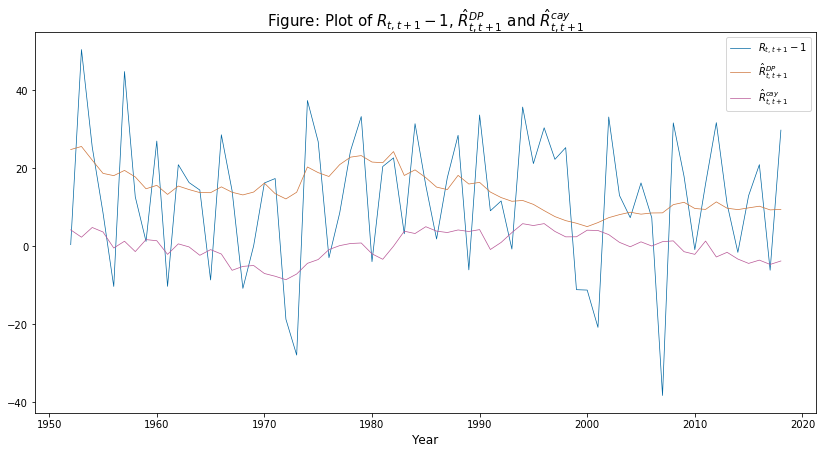

In [9]:
# ax will be an array of Axes objects
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#b85696', '#31686c', '#853c42']))

# Call plot() method on the appropriate object
ax.plot(sample['year'], (sample['Rtt1'] - 1) * 100, linewidth=0.7, label=r'$R_{t,t+1} - 1$')
ax.plot(sample['year'], result.params[1] * sample['DP'] * 100, linewidth=0.7, label=r'$\hat{R}_{t,t+1}^{DP}$')
ax.plot(sample['year'], result.params[2] * sample['cay'] * 100, linewidth=0.7, label=r'$\hat{R}_{t,t+1}^{cay}$')

ax.set_xlabel('Year', fontsize = 12)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(20))
ax.legend()
ax.set_title(r'Figure: Plot of $R_{t,t+1} - 1$, $\hat{R}_{t,t+1}^{DP}$ and $\hat{R}_{t,t+1}^{cay}$', fontsize = 15);

In [10]:
# Extract the regression sample
sample = df[['year', 'Rtt7', 'DP', 'cay']].copy()
# Drop the rows where at least one element is missing
sample.dropna(inplace = True)
# Dependent variable (nparray)
Y = np.array(sample['Rtt7'])[:, np.newaxis]
# Independent variables (nparray)
X = np.array(sample[['DP', 'cay']])
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()

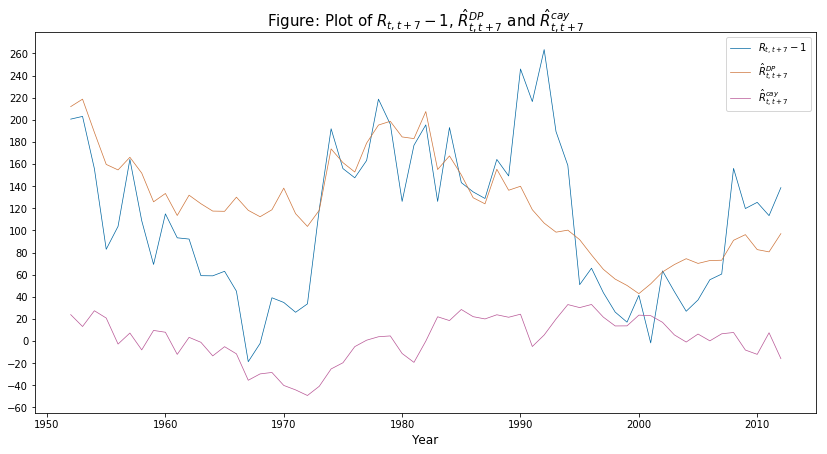

In [11]:
# ax will be an array of Axes objects
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#b85696', '#31686c', '#853c42']))

# Call plot() method on the appropriate object
ax.plot(sample['year'], (sample['Rtt7'] - 1) * 100, linewidth=0.7, label=r'$R_{t,t+7} - 1$')
ax.plot(sample['year'], result.params[1] * sample['DP'] * 100, linewidth=0.7, label=r'$\hat{R}_{t,t+7}^{DP}$')
ax.plot(sample['year'], result.params[2] * sample['cay'] * 100, linewidth=0.7, label=r'$\hat{R}_{t,t+7}^{cay}$')

ax.set_xlabel('Year', fontsize = 12)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(20))
ax.legend()
ax.set_title(r'Figure: Plot of $R_{t,t+7} - 1$, $\hat{R}_{t,t+7}^{DP}$ and $\hat{R}_{t,t+7}^{cay}$', fontsize = 15);

In [12]:
fig.savefig('q3fig1.pdf', format = 'pdf')